In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [2]:
sns.set(context='notebook',style='white')

In [3]:
dir_data = "'../../datasets/camargolab/"
dir_output = "output_fig5"

In [4]:
dict_palette={"HSC":"#0E76B9",'MPP':"#D2522A",'My':'#E8AF3C','Mk':'#79358C',
              'Ery':'#79A940','Ly':'#58C0EB','Other':'#991732'}

### Figure5 (ClonalTracingofBloodProgenitors to Adulthood)

In [5]:
dict_input = loadmat(os.path.join(dir_data,'Analysis_EB.mat'))

In [6]:
dict_input.keys()

dict_keys(['__header__', '__version__', '__globals__', 'sample_names', 'bones', 'N_bones', 'phenotypes', 'coarse_grain_pheno', 'marker_genes', 'None', 'fdr_level', 'combined', 'samples', 'pooled', 'L', 'p_crit', 'sig_level', 'bb_pval', 'min_cells', 'bones_present', 'nontrivial_pop_alleles', 'candidate_bb_alleles', 'bonferroni_correction_factor', 'bb_alleles', 'allele_biased_rep', 'allele_equal_rep', 'clone_by_cg_pheno', 'hsc_pheno', 'hsc_mask', 'derived_mask', 'outdir', '__function_workspace__'])

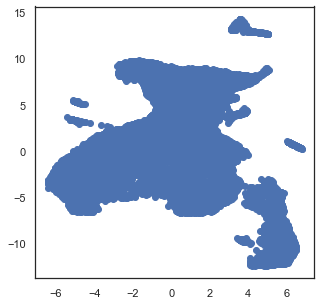

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(dict_input['pooled']['x'][0][0],dict_input['pooled']['y'][0][0])

In [8]:
df_fg = pd.DataFrame(columns=['label','clusters']) ##fine-grained phenotype
df_cg = pd.DataFrame(columns=['label','clusters']) ##coarse-grained phenotype
for i,row in enumerate(dict_input['phenotypes']):
    df_fg.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0], row[1].ravel().tolist()],
                               index= ['label','clusters'])
    
for i,row in enumerate(dict_input['coarse_grain_pheno']):
    df_cg.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0], row[1].ravel().tolist()],
                               index= ['label','clusters'])
    
df_sample = pd.DataFrame(columns=['label']) ##sample name
for i,row in enumerate(dict_input['sample_names']):
    df_sample.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0]],
                                   index= ['label'])

In [9]:
df_fg.head()

,label,clusters
1,HSC,"[0, 7, 13, 28]"
2,MPP,"[1, 2, 8, 9, 12, 19, 21, 22, 25, 30]"
3,MyP,"[15, 16]"
4,Neu,"[3, 11, 29]"
5,Mono,"[5, 6, 17, 35]"


In [10]:
df_cg.head()

,label,clusters
1,HSC,[1]
2,MPP,[2]
3,My,"[3, 4, 5, 6, 7, 8]"
4,Mk,[9]
5,Ery,[10]


In [11]:
df_sample.head()

,label
1,FO864/LF
2,FO864/RF
3,FO864/LH
4,FO864/RH


In [12]:
df_plot = pd.DataFrame(np.column_stack([dict_input['pooled']['x'][0][0],dict_input['pooled']['y'][0][0]]),
                       columns=['x','y'])
df_plot['louvain'] = ['cluster_'+x for x in dict_input['pooled']['louvain'][0][0].ravel().astype(str)]
df_plot['sample'] = [df_sample.loc[x,'label'] for x in dict_input['pooled']['sample'][0][0].ravel()]
###fine-grain phenotype
df_plot['fg_pheno'] = [df_fg.loc[x,'label'] for x in dict_input['pooled']['fg_pheno'][0][0].ravel()]
###coarse-grain phenotype
df_plot['cg_pheno'] = [df_cg.loc[x,'label'] for x in dict_input['pooled']['cg_pheno'][0][0].ravel()]
###alleles
df_plot['allele'] = [x for x in dict_input['pooled']['allele'][0][0].ravel()]
df_plot['allele_sample'] = df_plot['sample'].str.split('/',expand=True)[1] + df_plot['allele'].apply(str)

In [13]:
print(df_plot.shape)
df_plot.head()

(19056, 8)


,x,y,louvain,sample,fg_pheno,cg_pheno,allele,allele_sample
0,-3.414059,-0.375351,cluster_1,FO864/LF,MPP,MPP,1,LF1
1,0.890543,2.590187,cluster_22,FO864/LF,MPP,MPP,0,LF0
2,2.827723,-3.880122,cluster_20,FO864/LF,Mk,Mk,0,LF0
3,0.820263,5.096204,cluster_16,FO864/LF,MyP,My,0,LF0
4,4.517529,7.968855,cluster_5,FO864/LF,Mono,My,0,LF0


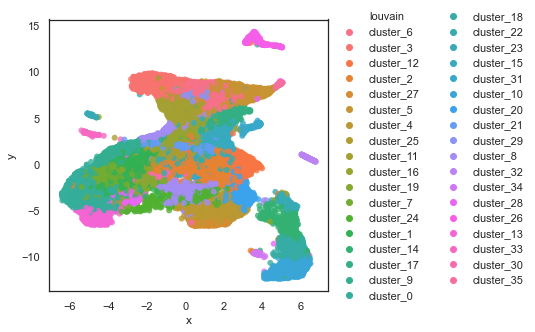

In [14]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), x="x", y="y",hue="louvain",linewidth=0,alpha=0.8)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

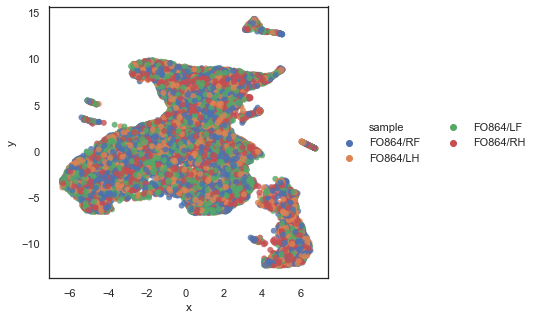

In [15]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), x="x", y="y",hue="sample",linewidth=0,alpha=0.8)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

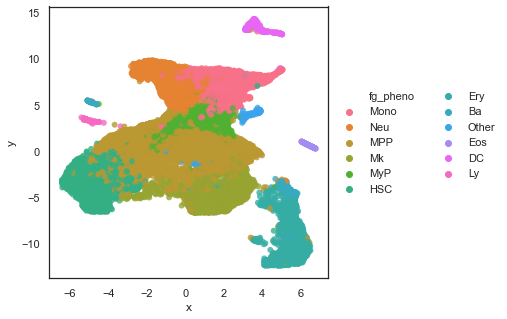

In [16]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), x="x", y="y",hue="fg_pheno",linewidth=0,alpha=0.8)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

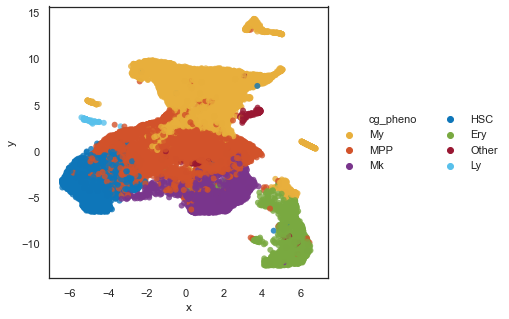

In [17]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), 
                   x="x", y="y",hue="cg_pheno",
                   linewidth=0,alpha=0.8,
                   palette=dict_palette)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=2,frameon=False)

(93, 8)


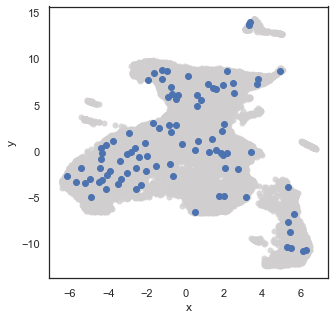

In [18]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), 
                   x="x", y="y",color='#D0CECE',
                   linewidth=0,alpha=0.8)
clone = 4
df_plot_clone = df_plot[(df_plot['allele']==clone)]
print(df_plot_clone.shape)
plt.scatter(df_plot_clone['x'],df_plot_clone['y'])

(14, 8)


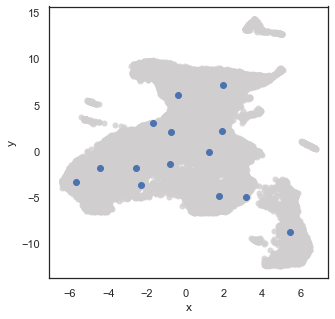

In [19]:
plt.figure(figsize=(5,5))
ax=sns.scatterplot(data=df_plot.sample(frac=1,random_state=2020), 
                   x="x", y="y",color='#D0CECE',
                   linewidth=0,alpha=0.8)
clone = 4
df_plot_clone = df_plot[(df_plot['allele_sample']=='LF'+str(clone))]
print(df_plot_clone.shape)
plt.scatter(df_plot_clone['x'],df_plot_clone['y'])

In [20]:
sum(df_plot['allele']>0)

3099

In [21]:
df_bbpval = pd.DataFrame(columns=['pval'])
for i,row in enumerate(dict_input['bb_pval']):
    df_bbpval.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0]],
                                   index= ['pval'])
    
df_derivedmask = pd.DataFrame(columns=['derived']) 
for i,row in enumerate(dict_input['derived_mask']):
    df_derivedmask.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0]],
                                   index= ['derived'])
    
# df_plot['bb_pval'] = [df_sample.loc[x,'pval'] for x in dict_input['bb_pval'][0][0].ravel()]
# df_plot['derived_mask'] = [df_sample.loc[x,'derived'] for x in dict_input['derived_mask'][0][0].ravel()]

In [22]:
df_candidate_bb_alleles = pd.DataFrame(columns=['candidate'])
for i,row in enumerate(dict_input['candidate_bb_alleles']):
    df_candidate_bb_alleles.loc[i+1] = pd.Series(data = [row[0].ravel().tolist()[0]],
                                                 index= ['candidate'])

In [23]:
df_plot_subset = df_plot[np.isin(df_plot['allele'],df_candidate_bb_alleles['candidate'])].copy()

In [24]:
df_plot_subset.head()

,x,y,louvain,sample,fg_pheno,cg_pheno,allele,allele_sample
21,3.441682,-0.244070,cluster_12,FO864/LF,MPP,MPP,11,LF11
56,-1.684425,3.004644,cluster_8,FO864/LF,MPP,MPP,4,LF4
105,-0.644891,4.223869,cluster_8,FO864/LF,MPP,MPP,9,LF9
111,2.256432,-2.226977,cluster_20,FO864/LF,Mk,Mk,10,LF10
116,-4.689144,-4.721473,cluster_0,FO864/LF,HSC,HSC,21,LF21


In [25]:
sizes = df_plot_subset.groupby(by=['allele','cg_pheno']).size()
clone_by_pheno = pd.DataFrame(data=0,
                              index = np.unique(df_plot_subset['allele']),
                              columns=np.unique(df_plot_subset['cg_pheno']))
for x in clone_by_pheno.index:
    for y in clone_by_pheno.columns:
        if(y in sizes[x].index):
            clone_by_pheno.loc[x,y] = sizes[x][y]
            
### reorder phenotypes
clone_by_pheno = clone_by_pheno[['HSC','MPP','My','Mk','Ery','Ly']]

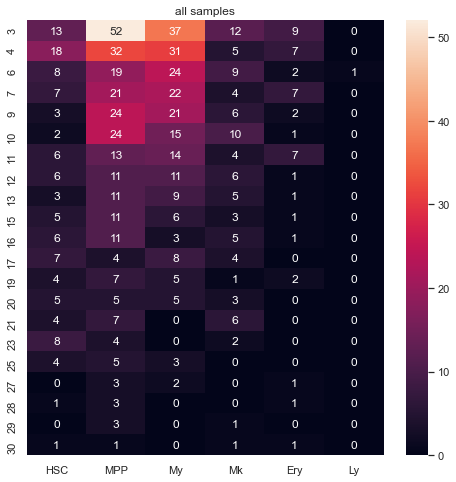

In [26]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(clone_by_pheno,annot=True)
plt.title('all samples')
plt.savefig(os.path.join(dir_output,'all_sample.png'),dpi=150)

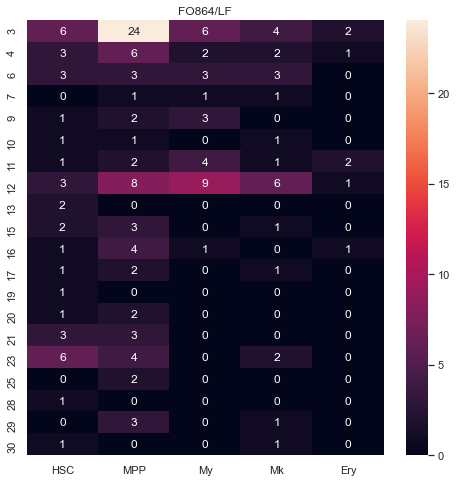

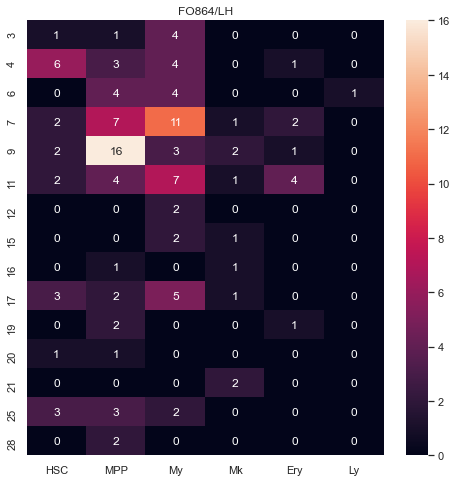

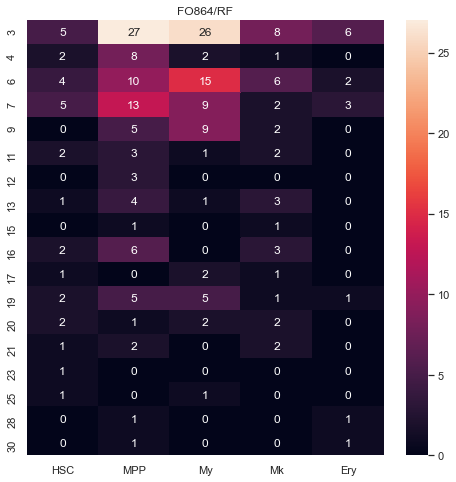

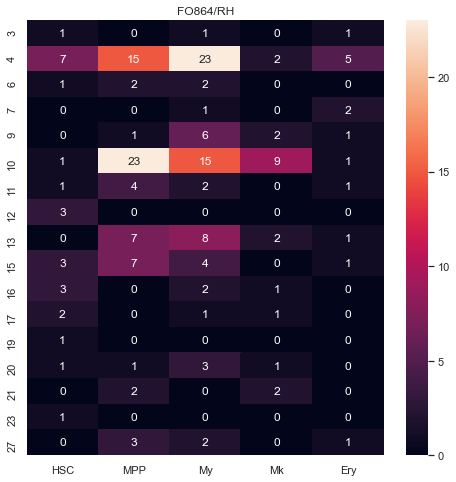

In [27]:
dict_sample = dict()
for x in np.unique(df_plot_subset['sample']):
    sizes_x = df_plot_subset.groupby(by=['sample','allele','cg_pheno']).size()
    clone_by_pheno_x = pd.DataFrame(data=0,
                                    index = np.unique(df_plot_subset[df_plot_subset['sample']==x]['allele']),
                                    columns=np.unique(df_plot_subset[df_plot_subset['sample']==x]['cg_pheno']))
    for xx in clone_by_pheno_x.index:
        for yy in clone_by_pheno_x.columns:
            if(yy in sizes_x[x][xx].index):
                clone_by_pheno_x.loc[xx,yy] = sizes_x[x][xx][yy]

    ### reorder phenotypes
    clone_by_pheno_x = clone_by_pheno_x[[xxx for xxx in ['HSC','MPP','My','Mk','Ery','Ly'] if xxx in clone_by_pheno_x.columns]]
    dict_sample[x] = clone_by_pheno_x
    plt.figure(figsize=(8,8))
    ax = sns.heatmap(clone_by_pheno_x,annot=True)
    plt.title(x)  
    plt.savefig(os.path.join(dir_output,x.split('/')[1]+'.png'),dpi=150)

### output

In [28]:
### clones of pooled bones
df_clones = pd.DataFrame(data = 0,
                         index=df_plot_subset.index,
                         columns=np.unique(df_plot_subset['allele']))
for i in range(df_plot_subset.shape[0]):
    df_clones.loc[df_plot_subset.index.tolist()[i],df_plot_subset['allele'].tolist()[i]] = 1

In [29]:
print(df_clones.shape)
df_clones.head()

(730, 21)


,3,4,6,7,9,10,11,12,13,15,...,17,19,20,21,23,25,27,28,29,30
21,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
### bone-specific clones
df_clones_bones = pd.DataFrame(data = 0,
                               index=df_plot_subset.index,
                               columns=np.unique(df_plot_subset['allele_sample']))
for i in range(df_plot_subset.shape[0]):
    df_clones_bones.loc[df_plot_subset.index.tolist()[i],df_plot_subset['allele_sample'].tolist()[i]] = 1

In [31]:
print(df_clones_bones.shape)
df_clones_bones.head()

(730, 70)


,LF10,LF11,LF12,LF13,LF15,LF16,LF17,LF19,LF20,LF21,...,RH19,RH20,RH21,RH23,RH27,RH3,RH4,RH6,RH7,RH9
21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_metadata = df_plot_subset.copy()
df_metadata['time']=0
df_coord = df_plot_subset[['x','y']].rename(columns={x:i for i,x in enumerate(['x','y'])}).copy()

In [33]:
df_metadata.head()

,x,y,louvain,sample,fg_pheno,cg_pheno,allele,allele_sample,time
21,3.441682,-0.244070,cluster_12,FO864/LF,MPP,MPP,11,LF11,0
56,-1.684425,3.004644,cluster_8,FO864/LF,MPP,MPP,4,LF4,0
105,-0.644891,4.223869,cluster_8,FO864/LF,MPP,MPP,9,LF9,0
111,2.256432,-2.226977,cluster_20,FO864/LF,Mk,Mk,10,LF10,0
116,-4.689144,-4.721473,cluster_0,FO864/LF,HSC,HSC,21,LF21,0


In [34]:
df_coord.head()

,0,1
21,3.441682,-0.244070
56,-1.684425,3.004644
105,-0.644891,4.223869
111,2.256432,-2.226977
116,-4.689144,-4.721473


In [35]:
df_clones.to_csv(os.path.join(dir_output,'clones.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_clones_bones.to_csv(os.path.join(dir_output,'clones_bones.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_metadata.to_csv(os.path.join(dir_output,'metadata.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')
df_coord.to_csv(os.path.join(dir_output,'coordinates.tsv.gz'),header=True,index=True,sep='\t',compression='gzip')